# Image similarity search with clustering

In [1]:
from image_classification_simulation.data.office31_loader import (
    Office31Loader
)
from image_classification_simulation.models.clustering import (
    show_grid_images
)
from image_classification_simulation.image_search import (
    ImageSimilaritySearch
)


In [ ]:
# hparams = {
#     "num_workers": 2,
#     'batch_size': 32,
#     "image_size":224,
#     "train_test_split":0.1,
# }
# office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
# office_loader.setup('fit')
# train_loader = office_loader.train_dataloader()
# val_loader = office_loader.val_dataloader()
# test_loader = office_loader.test_dataloader()
# # /network/projects/aia/img_classif_sim/vit/output/best_model
# hparams = {
#         "clustering_alg": "MiniBatchKMeans",
#         "loss": "CrossEntropyLoss",
#         "batch_size": 124,
#         "pretrained": True,
#         "num_classes": 31,
#         "path_features_ext": "../examples/resnet/output/best_model/model.ckpt",
#         "architecture": "resnet",
#         "num_clusters": 31,
#         "random_state": 0,
#         "clustering_batch_size": 124,
#         "size":256,
#         "reassignment_ratio": 0.05,
#         "path_to_model": "../debug/clustering_model.joblib",
#         "path_cluster_ids": "../debug/dataset_cluster_ids.csv",
#     }
# image_search = ImageSimilaritySearch(hparams, office_loader)
# image_search.setup()

In [2]:
hparams = {
    "num_workers": 2,
    'batch_size': 32,
    "image_size":224,
    "train_test_split":0.1,
}
office_loader = Office31Loader(data_dir="../examples/data/domain_adaptation_images/amazon/images/", hyper_params=hparams)
office_loader.setup('fit')
train_loader = office_loader.train_dataloader()
val_loader = office_loader.val_dataloader()
test_loader = office_loader.test_dataloader()
# /network/projects/aia/img_classif_sim/vit/output/best_model
hparams = {
        "clustering_alg": "MiniBatchKMeans",
        "loss": "CrossEntropyLoss",
        "pretrained": True,
        "batch_size": 124,
        "num_classes": 31,
        "path_features_ext": "/network/projects/aia/img_classif_sim/vit_refactor/output/best_model/model.ckpt",
        "architecture": "vit",
        "num_clusters": 62,
        "random_state": 0,
        "clustering_batch_size": 124,
        "reassignment_ratio": 0.01,
        "path_to_model": "../debug/clustering_model.joblib",
        "path_cluster_ids": "../debug/dataset_cluster_ids.csv",
    }
image_search = ImageSimilaritySearch(hparams, office_loader)
image_search.setup()

>>> loaded cluster ids from file
>>> Found cluster ids from file


Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model checkp

[MiniBatchKMeans] Reassigning 22 cluster centers.
[MiniBatchKMeans] Reassigning 12 cluster centers.
[MiniBatchKMeans] Reassigning 8 cluster centers.
>>> saved cluster ids to file
>>> setup completed successfully!


you may need to run this file as a python script to have results printed to file.

In [4]:
from image_classification_simulation.utils.visualization_utils import show_grid_images
import matplotlib.pyplot as plt

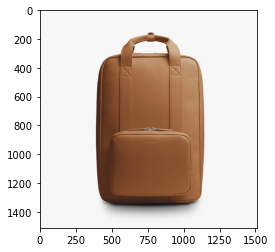

In [5]:
plt.imshow(plt.imread("./test_cases/backpack1.jpeg"))

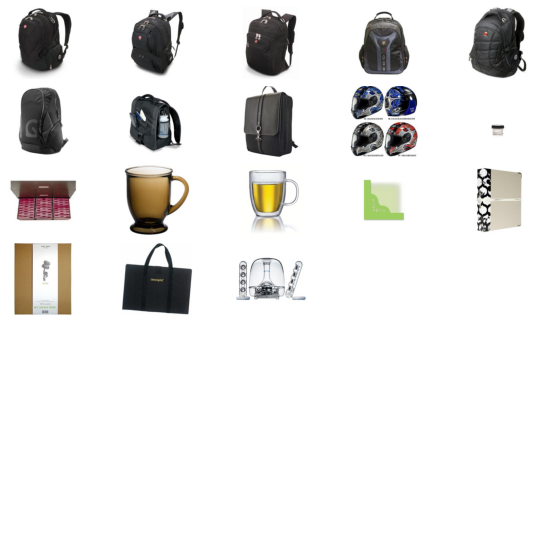

(<Figure size 720x720 with 35 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [6]:
query_res = image_search.find_similar_images("./test_cases/backpack1.jpeg")
show_grid_images(query_res['image_path'].tolist(),num_rows=7,num_cols=5)

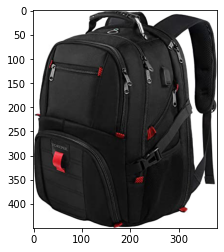

In [7]:
plt.imshow(plt.imread("./test_cases/backpack2.jpeg"))

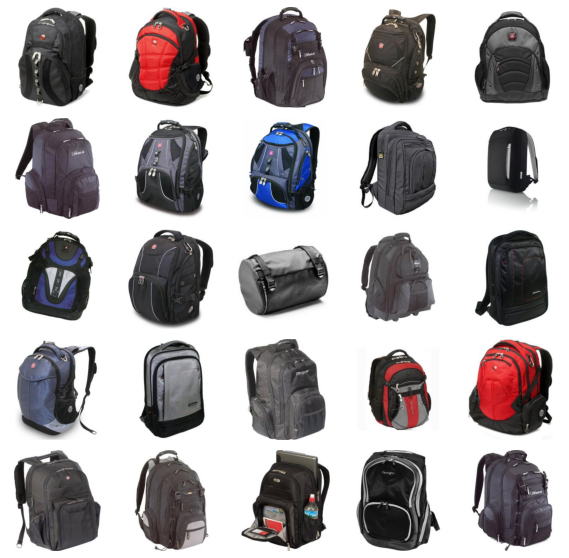

(<Figure size 720x720 with 25 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>]], dtype=object))

In [8]:
query_res = image_search.find_similar_images("./test_cases/backpack2.jpeg")
show_grid_images(query_res['image_path'].tolist())


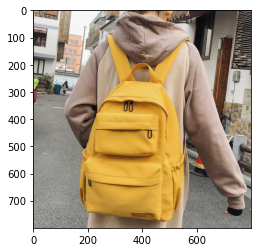

In [9]:
plt.imshow(plt.imread("./test_cases/backpack3.jpeg"))

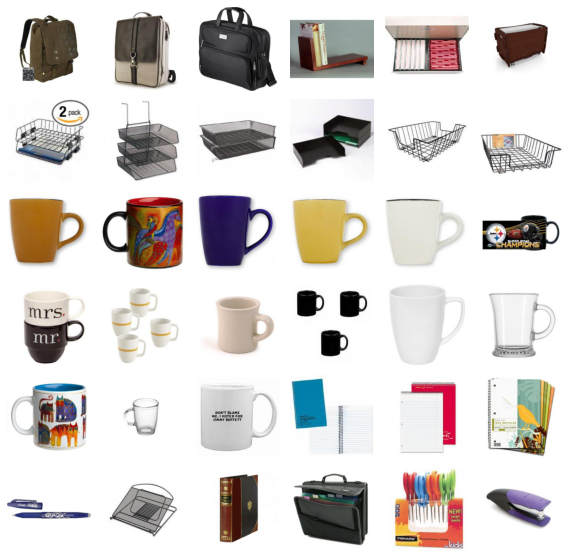

(<Figure size 720x720 with 36 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

In [10]:
query_res = image_search.find_similar_images("./test_cases/backpack3.jpeg")
show_grid_images(query_res['image_path'].tolist(),num_rows=6,num_cols=6)
